In [1]:
# 套件

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
# 彈性的方式: 可以分享參數


inputs = keras.Input(shape=(784, ))     # batch_size 不用指定

In [3]:
# 圖片inputs

img_inputs = keras.Input((32, 32, 3))

In [4]:
inputs.shape

TensorShape([None, 784])

In [5]:
inputs.dtype

tf.float32

In [6]:
dense = layers.Dense(units=64)

x = dense(inputs)   

In [7]:
x = layers.Dense(units=64, activation='relu')(x)
outputs = layers.Dense(units=10)(x)

In [8]:
model = keras.Model(inputs=inputs, outputs=outputs, name='mnist_model')

In [9]:
model.summary()

Model: "mnist_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


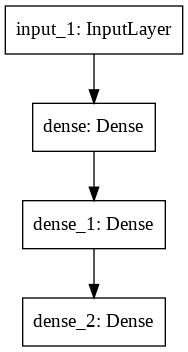

In [10]:
keras.utils.plot_model(model, 'mnist_model.png')

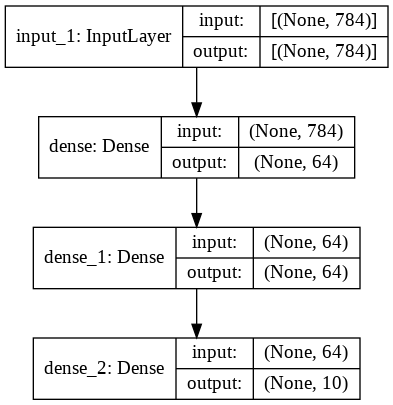

In [11]:
keras.utils.plot_model(model, 'mnist_model.png', show_shapes=True)

In [12]:
# train, evaluate, inference

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.reshape(60000, 784).astype('float32') / 255.0
x_test = x_test.reshape(10000, 784).astype('float32') / 255.0

model.compile(optimizer='adam', loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['acc'])      # 因為模型沒有softmax, from_logits=True, 代表輸出還沒有機率化
history = model.fit(x_train, y_train, 64, 10, validation_split=0.2)

test_scores = model.evaluate(x_test, y_test, verbose=2)

11493376/11490434 [==============================] - 0s 0us/step
Epoch 1/10
750/750 [==============================] - 5s 2ms/step - loss: 0.3562 - acc: 0.8969 - val_loss: 0.1897 - val_acc: 0.9447
Epoch 2/10
750/750 [==============================] - 2s 2ms/step - loss: 0.1728 - acc: 0.9477 - val_loss: 0.1582 - val_acc: 0.9525
Epoch 3/10
750/750 [==============================] - 2s 2ms/step - loss: 0.1298 - acc: 0.9609 - val_loss: 0.1329 - val_acc: 0.9612
Epoch 4/10
750/750 [==============================] - 2s 2ms/step - loss: 0.1053 - acc: 0.9685 - val_loss: 0.1209 - val_acc: 0.9638
Epoch 5/10
750/750 [==============================] - 2s 2ms/step - loss: 0.0891 - acc: 0.9729 - val_loss: 0.1092 - val_acc: 0.9688
Epoch 6/10
750/750 [==============================] - 2s 2ms/step - loss: 0.0794 - acc: 0.9751 - val_loss: 0.1060 - val_acc: 0.9685
Epoch 7/10
750/750 [==============================] - 2s 2ms/step - loss: 0.0686 - acc: 0.9782 - val_loss: 0.1150 - val_acc: 0.9643
Epoch 8/10


In [13]:
print('Test loss: ', test_scores[0])
print('Test acc: ', test_scores[1])

Test loss:  0.09945399314165115
Test acc:  0.9717000126838684


In [14]:
# save and serialize

model.save('path_to_my_model')
del model

INFO:tensorflow:Assets written to: path_to_my_model/assets


In [15]:
# Recreate the exact same model purely from the file:
model = keras.models.load_model("path_to_my_model")

In [16]:
model.summary()

Model: "mnist_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0995 - acc: 0.9717


[0.09945399314165115, 0.9717000126838684]

In [18]:
# autoencoder

In [19]:
encoder_input = keras.Input(shape=(28, 28, 1), name='img')
x = layers.Conv2D(16, 3, activation='relu')(encoder_input)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPool2D(3)(x)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.Conv2D(16, 3, activation='relu')(x)
encoder_output = layers.GlobalAveragePooling2D()(x)

encoder = keras.Model(inputs=encoder_input, outputs=encoder_output, name='encoder')
encoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 32)          9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 16)          4624      
_________________________________________________________________
global_average_pooling2d (Gl (None, 16)                0   

In [20]:
x = layers.Reshape((4, 4, 1))(encoder_output)
x = layers.Conv2DTranspose(16, 3, activation='relu')(x)
x = layers.Conv2DTranspose(32, 3, activation='relu')(x)
x = layers.UpSampling2D(3)(x)
x = layers.Conv2DTranspose(16, 3, activation='relu')(x)
decoder_output = layers.Conv2DTranspose(1, 3, activation='relu')(x)


autoencoder = keras.Model(encoder_input, decoder_output, name='autoencoder')
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 32)          9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 16)          4624      
_________________________________________________________________
global_average_pooling2d (Gl (None, 16)                

## All models are callable, just like layers

In [22]:
# ensemble: 每一個model可以被視為一個layer

def get_model():
    inputs = keras.Input(shape=(128,))
    outputs = layers.Dense(1)(inputs)
    return keras.Model(inputs, outputs)


model1 = get_model()
model2 = get_model()
model3 = get_model()

inputs = keras.Input(shape=(128,))
y1 = model1(inputs)
y2 = model2(inputs)
y3 = model3(inputs)

outputs = layers.Average()([y1, y2, y3])
ensemble_model = keras.Model(inputs, outputs)

ensemble_model.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           [(None, 128)]        0                                            
__________________________________________________________________________________________________
model_3 (Functional)            (None, 1)            129         input_10[0][0]                   
__________________________________________________________________________________________________
model_4 (Functional)            (None, 1)            129         input_10[0][0]                   
__________________________________________________________________________________________________
model_5 (Functional)            (None, 1)            129         input_10[0][0]                   
____________________________________________________________________________________________

In [24]:
# 建立一個消費者問題分配系統
# input 1: ticket title
# input 2: text body
# input 3: tags

num_tags = 12
num_words = 10000
num_departments = 4

title_input = keras.Input(shape=(None, ), name='title')    
body_input = keras.Input(shape=(None, ), name='body')
tags_input = keras.Input(shape=(num_tags, ), name='tags')       # one-hot

# embedding
title_features = layers.Embedding(num_words, 64)(title_input)
body_features = layers.Embedding(num_words, 64)(body_input)

# 將embedding words 縮減成單一128、32-dimensional vector
title_features = layers.LSTM(128)(title_features)
body_features = layers.LSTM(32)(body_features)


# Merge all available features into a single large vector via concatenation
x = layers.concatenate([title_features, body_features, tags_input])

# output1: 優先順序(機率評分)
priority_pred = layers.Dense(1, name='priority', activation='sigmoid')(x)
# output2: 部分分類(機率)
department_pred = layers.Dense(num_departments, name='department', activation='softmax')(x)

# 結合模型
model = keras.Model(
    inputs=[title_input, body_input, tags_input],
    outputs=[priority_pred, department_pred]
)

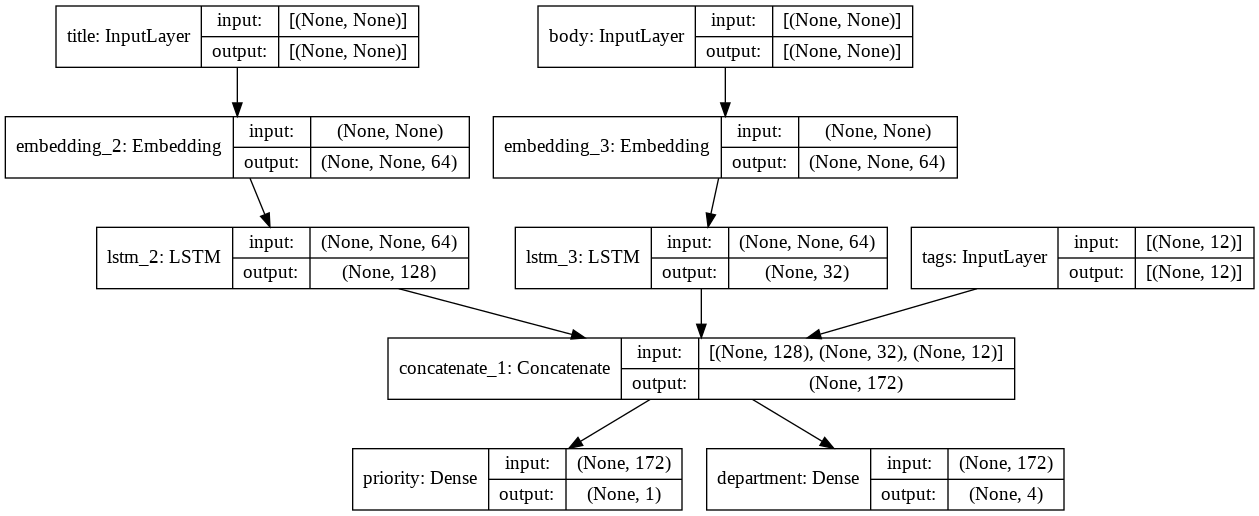

In [25]:
keras.utils.plot_model(model , 'multi_input_and_output_model.png', show_shapes=True)

In [26]:
# compile 模型，指定loss function、optimizer、weights(可分開指定權重)

model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss=[
          keras.losses.BinaryCrossentropy(from_logits=False),   # 因為已經用了sigmoid
          keras.losses.CategoricalCrossentropy(from_logits=False)       # 因為已經使用了softmax
    ],
    loss_weights=[1.0, 0.2],
)

In [27]:
# 也可以透過名字指定

model.compile(
    optimizer=keras.optimizers.Adam(),
    loss={
        'priority': keras.losses.BinaryCrossentropy(),
        'department': keras.losses.CategoricalCrossentropy()
    },
    loss_weights={'priority': 1.0, 'department': 0.2}
)

In [30]:
# dummy input data
title_data = np.random.randint(num_words, size=(1280, 10))
body_data = np.random.randint(num_words, size=(1280, 100))
tags_data = np.random.randint(2, size=(1280, num_tags)).astype('float32')

# dummy target data
priority_targets = np.random.random(size=(1280, 1))
dept_targets = np.random.randint(2, size=(1280, num_departments))

model.fit(
    x={'title':title_data, 'body': body_data, 'tags': tags_data},
    y={'priority': priority_targets, 'department': dept_targets},
    epochs=2,
    batch_size=32
)


# end/2021/7/31

Epoch 1/2
40/40 [==============================] - 7s 21ms/step - loss: 1.2887 - priority_loss: 0.7053 - department_loss: 2.9172
Epoch 2/2
40/40 [==============================] - 1s 21ms/step - loss: 1.3503 - priority_loss: 0.7005 - department_loss: 3.2490
